In [1]:
import glob
from meza import io
import numpy as np
import pandas as pd
import pandas_access as mdb
import zipfile
import os
from os.path import join, basename
from params import get_params

In [2]:
params = get_params()
path = '/Users/pierredelice/Library/CloudStorage/Dropbox/Mac/Documents/GitHub/Defunción/Data/nacimiento/'
file = glob.glob(join(path,r'*.csv'))
file_zip = glob.glob(join(path,r'*.zip'))

for arc_name in glob.iglob(os.path.join(path, "*.zip")):
    arc_dir_name = os.path.splitext(os.path.basename(arc_name))[0]
    zf = zipfile.ZipFile(arc_name)
    zf.extractall(path=os.path.join(path, "nac_unzip", arc_dir_name))
    zf.close()  # Close file after extraction is completed

#Iterate through folders, directories and subdirectories.
def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

files_mdb =list_files(join(path,'nac_unzip'))

In [3]:
files_mdb[2]

'/Users/pierredelice/Library/CloudStorage/Dropbox/Mac/Documents/GitHub/Defunción/Data/nacimiento/nac_unzip/SINAC0936/SINAC0936.mdb'

In [ ]:
#pd.concat([pd.read_csv(idx,encoding= 'unicode_escape') for idx in file])

In [5]:
from mdb_parser import MDBParser, MDBTable

db = MDBParser(file_path=files_mdb[2])


# Get and print the database tables
print(db.tables)

# Get a table from the DB.
table = db.get_table("NACIMIENTO")

# Or you can use the MDBTable class.
table = MDBTable(file_path=files_mdb[2], table="NACIMIENTO")

# Get and print the table columns.
print(table.columns)

# Iterate the table rows.
#for row in table:
#    print(row)


['CatAtendioParto', 'CatCertifica', 'CATCLUES', 'CATDEREC', 'CatEscolaridad', 'CatEstados', 'CatJurisd', 'CatLocal', 'CatLugarNac', 'CATLUGCAPT', 'CATMPO', 'CATOCUHA', 'CATPRODUCTO', 'CatSexo', 'CatSiNo', 'CatTipoProced', 'CatTrimestres', 'CatVariables', 'DATINI', 'Listadet', 'NACIMIENTO', 'CatEdoConyugal', 'CATMESES', 'CatTipoNaciAnterior']
['CEDOCVE', 'FOLIO', 'NOMBRE', 'PATERNO', 'MATERNO', 'CURP_M', 'ENT_NACM', 'MPO_NACM', 'FECH_NACM', 'EDOCIVIL', 'CALLE_RES', 'ENT_RES', 'MPO_RES', 'LOC_RES', 'NUM_EMB', 'NUM_NACMTO', 'NUM_NACVIVO', 'HIJO_SOBV', 'HIJO_ANTE', 'VIVE_AUN', 'FECH_NHEA', 'ORDEN_NAC', 'ATEN_PREN', 'TRIM_CONS', 'TOT_CONS', 'SOB_PARTO', 'CERTDEF', 'DERHAB', 'NUMAFILIAC', 'DERHAB2', 'NIV_ESCOL', 'OCUPHAB', 'CVEOCUPHAB', 'TRAB_ACT', 'FECH_NACH', 'HORA_NACH', 'SEXOH', 'GESTACH', 'TALLAH', 'PESOH', 'APGARH', 'SILVERMAN', 'BCG', 'HEP_B', 'VIT_A', 'VIT_K', 'TAM_MET', 'TAM_AUD', 'PRODUCTO', 'ACELRN', 'CVE_CIE', 'ACELRN2', 'CVE_CIE2', 'PROCNAC', 'ESPECIFIQUE', 'INST_NAC', 'UNIMED',

In [6]:
nacimiento = []
for row in table:
    nacimiento.append(row)


In [7]:
cols = ['FOLIO','NOMBRE','PATERNO','MATERNO','CURP_M','ENT_NACM','MPO_NACM','FECH_NACM', 
'EDOCIVIL','CALLE_RES','ENT_RES','MPO_RES','LOC_RES','HIJO_SOBV','CERTDEF',
 'DERHAB','NIV_ESCOL','OCUPHAB','FECH_NACH','HORA_NACH','SEXOH']

nac_sample = pd.DataFrame(nacimiento, columns = table.columns)
nac_sample = nac_sample[cols] 
nac_sample = nac_sample.sample(n=10000, random_state=1)
nac_sample.columns = nac_sample.columns.str.lower()

nac_sample[['nombre', 'paterno', 'materno', 'calle_res', 'ocuphab']] = \
    (nac_sample[['nombre', 'paterno', 'materno', 'calle_res', 'ocuphab']]
    .astype('category')
    .apply(lambda x: x.str.lower()))

<AxesSubplot: >

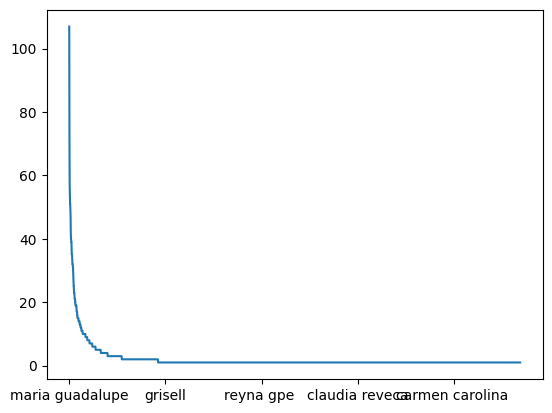

In [8]:
nac_sample['nombre'].value_counts().plot()